<a href="https://colab.research.google.com/github/sda96/AIFFEL_3rd_hackerton_TUNiB_DKTC/blob/main/notebook/ChangHyun/%EB%AA%A8%EB%8D%B8%EC%84%B1%EB%8A%A5_%EB%B9%84%EA%B5%90%ED%91%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 환경 설정

#### 필요한 패키지 설치하기

In [ ]:
!pip install transformers
!pip install sentencepiece

     |████████████████████████████████| 3.5 MB 4.2 MB/s 
     |████████████████████████████████| 6.8 MB 16.3 MB/s 
     |████████████████████████████████| 67 kB 7.8 MB/s 
     |████████████████████████████████| 596 kB 69.8 MB/s 
     |████████████████████████████████| 895 kB 62.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 1.2 MB 3.5 MB/s 


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/TUNiB준비반/AIFFEL_3rd_hackerton_TUNiB_DKTC/notebook/ChangHyun/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### matplotlib 한글 깨짐 해결 코드

해당 [사이트](https://teddylee777.github.io/colab/colab-korean)를 참고하여 위의 코드를 실행한 다음 런타임 재시작을 해주어야 합니다.

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (2,926 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and d

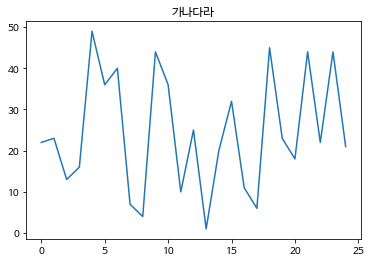

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 한글 지원 폰트
plt.rc('font', family='NanumBarunGothic')

# 마이너스 부호 
plt.rcParams['axes.unicode_minus'] = False

plt.plot(np.random.randint(1, 50, 25))
plt.title("가나다라")
plt.show()

## 데이터 불러오기

In [ ]:
import pandas as pd

under_train = pd.read_csv("./prototype_model/data/sample_data.csv")
under_train.groupby("class").count().iloc[:,0]

class
0    896
1    896
2    896
3    896
4    896
Name: Unnamed: 0, dtype: int64

#### 훈련셋 검증셋 나누기

In [ ]:
from sklearn.model_selection import train_test_split
from collections import defaultdict, Counter

X = under_train["pre_conversation"].to_list()
Y = under_train["class"].to_list()

x_train, x_val_test, y_train, y_val_test = train_test_split(X, Y, 
                                                            test_size = 0.1, 
                                                            random_state = 200,
                                                            stratify = Y)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test,
                                                test_size = 0.5,
                                                random_state = 202,
                                                stratify = y_val_test)
print(f"x_train 개수 : {len(x_train)}")
print(f"y_train 개수 : {len(y_train)}")
print(f"x_val 개수 : {len(x_val)}")
print(f"y_val 개수 : {len(y_val)}")
print(f"x_test 개수 : {len(x_test)}")
print(f"y_test 개수 : {len(y_test)}")

print(f"훈련 데이터 레이블 비율 확인 : {Counter(y_train)}")
print(f"검증 데이터 레이블 비율 확인 : {Counter(y_val)}")
print(f"테스트 데이터 레이블 비율 확인 : {Counter(y_test)}")

x_train 개수 : 4032
y_train 개수 : 4032
x_val 개수 : 224
y_val 개수 : 224
x_test 개수 : 224
y_test 개수 : 224
훈련 데이터 레이블 비율 확인 : Counter({3: 807, 4: 807, 1: 806, 0: 806, 2: 806})
검증 데이터 레이블 비율 확인 : Counter({0: 45, 2: 45, 3: 45, 1: 45, 4: 44})
테스트 데이터 레이블 비율 확인 : Counter({2: 45, 1: 45, 4: 45, 0: 45, 3: 44})


## 모델들 불러오기

#### BERT 모델

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import TextClassificationPipeline


# Load Fine-tuning model
bert_path = "./prototype_model/model/fine-tuned-klue-bert-base"
bert_tokenizer = BertTokenizer.from_pretrained(bert_path)
bert_model = TFBertForSequenceClassification.from_pretrained(bert_path)

bert_classifier = TextClassificationPipeline(
    tokenizer=bert_tokenizer, 
    model=bert_model, 
    framework='tf',
    return_all_scores=True
)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at ./prototype_model/model/fine-tuned-klue-bert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


#### KoELECTRA 모델 불러오기

In [ ]:
from transformers import ElectraTokenizer, TFElectraForSequenceClassification

# Load Fine-tuning model
electra_path = "./prototype_model/model/fine-tuned-koelectra-base-v3"
electra_tokenizer = ElectraTokenizer.from_pretrained(electra_path)
electra_model = TFElectraForSequenceClassification.from_pretrained(electra_path)

electra_classifier = TextClassificationPipeline(
    tokenizer=electra_tokenizer, 
    model=electra_model, 
    framework='tf',
    return_all_scores=True
)

All model checkpoint layers were used when initializing TFElectraForSequenceClassification.

All the layers of TFElectraForSequenceClassification were initialized from the model checkpoint at ./prototype_model/model/fine-tuned-koelectra-base-v3.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFElectraForSequenceClassification for predictions without further training.


#### LSTM 모델 불러오기

In [ ]:
import tensorflow as tf

lstm_path = "./prototype_model/model/LSTM-model/LSTM_10epoch_model.h5"
lstm_model = tf.keras.models.load_model(lstm_path)

## 모델별 성능 체크

#### 불러온 모델들 테스트 데이터 예측하기

In [ ]:
from tqdm import tqdm

bert_list = []
electra_list = []
lstm_list = []

for text in tqdm(x_test):
  bert_pred = bert_classifier(text)[0]
  bert_pred = max(bert_pred, key=lambda x: x['score'])["label"]
  
  electra_pred = electra_classifier(text)[0]
  electra_pred = max(electra_pred, key=lambda x: x['score'])["label"]

  bert_list += [bert_pred]
  electra_list += [electra_pred]

bert_list = [int(label[-1]) for label in bert_list]
electra_list = [int(label[-1]) for label in electra_list]

100%|██████████| 224/224 [05:47<00:00,  1.55s/it]


In [ ]:
import numpy as np
import sentencepiece as spm
from tensorflow.keras.preprocessing.sequence import pad_sequences

spm_path = "./prototype_model/bpe_10000_train_spm.model"
lstm_tokenizer = spm.SentencePieceProcessor()
lstm_tokenizer.Load(spm_path)

token_x_test = [lstm_tokenizer.EncodeAsIds(x) for x in x_test]
max_length = 333
padded_x_test = pad_sequences(token_x_test, maxlen = max_length)

lstm_list = np.argmax(lstm_model.predict(padded_x_test), axis = -1)

#### 모델들 F1-score 구하기

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

bert_num_false = np.sum(np.array(bert_list) !=  np.array(y_test))
print("BERT 모델 분류 성능 평가")
print(f"BERT 모델 틀린 갯수 {np.sum(bert_num_false)}개")
print(classification_report(bert_list, y_test))
print("\n")

elec_num_false = np.sum(np.array(electra_list) !=  np.array(y_test))
print("ELECTRA 모델 분류 성능 평가")
print(f"ELECTRA 모델 틀린 갯수 {np.sum(elec_num_false)}개")
print(classification_report(electra_list, y_test))
print("\n")

lstm_num_false = np.sum(np.array(lstm_list) !=  np.array(y_test))
print("LSTM 모델 분류 성능 평가")
print(f"LSTM 모델 틀린 갯수 {np.sum(lstm_num_false)}개")
print(classification_report(lstm_list, y_test))

BERT 모델 분류 성능 평가
BERT 모델 틀린 갯수 19개
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        53
           1       0.82      0.95      0.88        39
           2       0.91      1.00      0.95        41
           3       0.84      0.80      0.82        46
           4       1.00      1.00      1.00        45

    accuracy                           0.92       224
   macro avg       0.91      0.92      0.92       224
weighted avg       0.92      0.92      0.91       224



ELECTRA 모델 분류 성능 평가
ELECTRA 모델 틀린 갯수 20개
              precision    recall  f1-score   support

           0       0.98      0.85      0.91        52
           1       0.93      0.82      0.87        51
           2       0.89      1.00      0.94        40
           3       0.75      0.92      0.83        36
           4       1.00      1.00      1.00        45

    accuracy                           0.91       224
   macro avg       0.91      0.92      0.91       224

#### 모델별 confusion matrix 구하기

In [ ]:
bert_conf = confusion_matrix(bert_list, y_test)
elec_conf = confusion_matrix(electra_list, y_test)
lstm_conf = confusion_matrix(lstm_list, y_test)

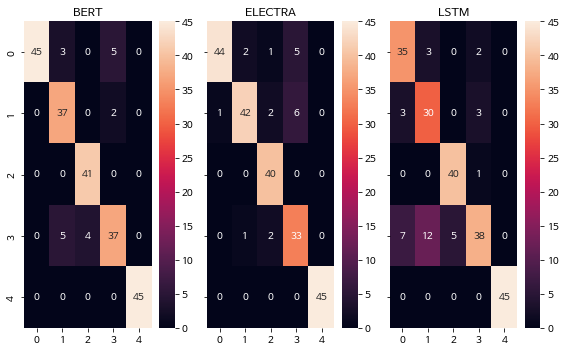

In [ ]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize = (8, 5))

g1 = sns.heatmap(bert_conf, annot = True, ax = axes[0])
g1.set_title("BERT")
g2 = sns.heatmap(elec_conf, annot = True, ax = axes[1])
g2.set_title("ELECTRA")
g3 = sns.heatmap(lstm_conf, annot = True, ax = axes[2])
g3.set_title("LSTM")
plt.tight_layout()
plt.show()

## Soft voting Ensemble Method

In [ ]:
bucket_y_pred = []
tmp = []

for i in tqdm(range(len(x_test))):
  text = x_test[i]

  elec_pred = electra_classifier(text)[0]
  elec_pred = np.array(list(map(lambda x: x["score"], elec_pred)))

  bert_pred = bert_classifier(text)[0]
  bert_pred = np.array(list(map(lambda x: x["score"], bert_pred)))
  lstm_pred = lstm_model.predict(padded_x_test[i:i+1])[0]

  # 모델 3개 : electra, bert, lstm
  mean_prob = np.average([elec_pred, bert_pred, lstm_pred], axis = 0)
  # 모델 2개 : electra, bert
  tmp_prob = np.average([elec_pred, bert_pred], axis = 0)

  y_pred = np.argmax(mean_prob)
  tmp_pred = np.argmax(tmp_prob)

  bucket_y_pred.append(y_pred)
  tmp.append(tmp_pred)

100%|██████████| 224/224 [05:46<00:00,  1.55s/it]


#### electra, bert 모델 2개인경우와 electra, bert, lstm 3개 soft voting을 시킨 결과 비교

In [ ]:
softvoting_tmp_false = np.sum(np.array(tmp) !=  np.array(y_test))
print("Soft Voting 모델 분류 성능 평가")
print(f"Soft Voting 모델 틀린 갯수 {np.sum(softvoting_tmp_false)}개")
print(classification_report(tmp, y_test))
print("\n")

softvoting_num_false = np.sum(np.array(bucket_y_pred) !=  np.array(y_test))
print("Soft Voting 모델 분류 성능 평가")
print(f"Soft Voting 모델 틀린 갯수 {np.sum(softvoting_num_false)}개")
print(classification_report(bucket_y_pred, y_test))

Soft Voting 모델 분류 성능 평가
Soft Voting 모델 틀린 갯수 16개
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        53
           1       0.93      0.91      0.92        46
           2       0.91      1.00      0.95        41
           3       0.80      0.90      0.84        39
           4       1.00      1.00      1.00        45

    accuracy                           0.93       224
   macro avg       0.93      0.93      0.93       224
weighted avg       0.93      0.93      0.93       224



Soft Voting 모델 분류 성능 평가
Soft Voting 모델 틀린 갯수 17개
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        48
           1       0.89      0.89      0.89        45
           2       0.93      1.00      0.97        42
           3       0.82      0.82      0.82        44
           4       1.00      1.00      1.00        45

    accuracy                           0.92       224
   macro avg       0.92      0.

y축은 true, x축은 pred입니다.   
https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix

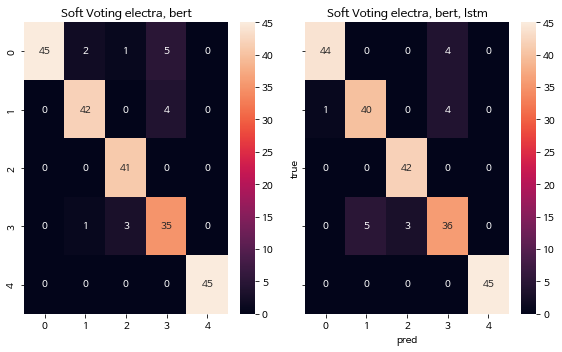

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize = (8, 5))
label = ["협박 대화", "갈취 대화", "직장내 괴롭힘 대화", "기타 괴롭힘 대화", "일반 대화"]

tmp_soft_voting = confusion_matrix(tmp, y_test)
f1 = sns.heatmap(tmp_soft_voting, annot = True, ax = axes[0])
f1.set_title("Soft Voting electra, bert")

soft_voting = confusion_matrix(bucket_y_pred, y_test)
f2 = sns.heatmap(soft_voting, annot = True, ax = axes[1])
f2.set_title("Soft Voting electra, bert, lstm")
plt.xlabel("pred")
plt.ylabel("true")
plt.tight_layout()
plt.show()

#### electra, bert 2개의 모델 틀린 경우 확인

In [ ]:
def id2label(x):
  if x == 0:
    return "협박 대화"
  elif x == 1:
    return "갈취 대화"
  elif x == 2:
    return "직장 내 괴롭힘 대화"
  elif x == 3:
    return "기타 괴롭힘 대화"
  elif x == 4:
    return "일반 대화"

In [ ]:
tmp_false_list = []
for idx, label in enumerate(tmp):
  if label != y_test[idx]:
    tmp_false_list.append(idx)

tmp_false_text = np.array(x_test)[tmp_false_list]
tmp_false_pred = np.array(tmp)[tmp_false_list]
tmp_false_true = np.array(y_test)[tmp_false_list]

In [ ]:
tmp_false_df = pd.DataFrame({"text":tmp_false_text, "pred":tmp_false_pred, "true":tmp_false_true})
tmp_false_df["true"] = tmp_false_df["true"].apply(lambda x : id2label(x))
tmp_false_df["pred"] = tmp_false_df["pred"].apply(lambda x : id2label(x))
tmp_false_df

,text,pred,true
0,야 뭐하냐 어 아 이 찐따새끼 또 만화 쳐보고 있네 이딴게 재밌냐 하지마 돌려줘 뭐...,협박 대화,기타 괴롭힘 대화
1,선배 제 뒷담 그만좀 하세요 내가 언제 이제 저도 지칩니다 들었어 어디서 많이 들었...,기타 괴롭힘 대화,직장 내 괴롭힘 대화
2,이자는 이자까지 줬잖아 그건 저번 기간 이자고 이번 기간 이자까지 줘야지 이 년아 ...,협박 대화,기타 괴롭힘 대화
3,어우 김선생 좀봐 머리를 하고왔는데도 얼굴이 저 꼬라지네 못봐주겠다 진짜 저 인간은...,기타 괴롭힘 대화,직장 내 괴롭힘 대화
4,선생님 저 이번 시험 점수 도저히 납득이 되질 않습니다 은혜야 갑자기 그게 무슨 말...,협박 대화,갈취 대화
5,아니 피뽑는게 왜이렇게아파 환자분 원래조끔 따금해요 바늘이 들어가는데 안아플수가없잖...,협박 대화,기타 괴롭힘 대화
6,야 체육복 있냐 응 응응 있지 왜 나 교시에 체육시간인데 체육복 없어서 빌려주라 아...,갈취 대화,기타 괴롭힘 대화
7,야야 너 기절놀이아냐 그게뭔데 궁금하지 이리와봐 알려줄께 이렇게 목 조르면 기절한다...,협박 대화,기타 괴롭힘 대화
8,선생님 저희 얘 좀 잘 부탁드려요 지우 어머님 이러지마세요 저희 얘 꼭 좋은 대학교...,기타 괴롭힘 대화,갈취 대화
9,야 거지 너네집 저기 판자촌이라면서 판자촌이 뭐야 왜 저 위에 다 쓰러져가는 집들 ...,갈취 대화,기타 괴롭힘 대화


In [ ]:
for i in range(len(tmp_false_df)):
  sentence, prediction, real =tmp_false_df.iloc[i, :]
  print(f"예측 분류 : {prediction}")
  print(f"실제 분류 : {real}")
  print(sentence)
  print("\n")

예측 분류 : 협박 대화
실제 분류 : 기타 괴롭힘 대화
야 뭐하냐 어 아 이 찐따새끼 또 만화 쳐보고 있네 이딴게 재밌냐 하지마 돌려줘 뭐래 오타쿠년이 이딴거나 보고 있으니 니 인생이 그렇지 하지마 돌려달란말이야 어쭈 이젠 기어오르시겠다 아 아니야 미안 이 만화처럼 너도 한 번 맞아야 정신 차리겠구나 미안해


예측 분류 : 기타 괴롭힘 대화
실제 분류 : 직장 내 괴롭힘 대화
선배 제 뒷담 그만좀 하세요 내가 언제 이제 저도 지칩니다 들었어 어디서 많이 들었어요 못생긴게 일못한다는건 팩트잖아 선배 저 신고할게요 하던지요 시끌벅쩍 재밌겠네 사과 하시면 저도 끝낼게요 참는다고요 하던 일이나 하세요


예측 분류 : 협박 대화
실제 분류 : 기타 괴롭힘 대화
이자는 이자까지 줬잖아 그건 저번 기간 이자고 이번 기간 이자까지 줘야지 이 년아 얼만데 너 하는 꼬라지 같아서 은 더 받아야겠는데 장난하지 말고 이자는 됐으니까 좀 맞자 저번에 잊었어 원금 다 갚은 대신 내 집에 들어오지 말고내 몸 털끝 하나도 건들지 말라고 난 동의한 적 없어 멍청한 년아 죽을때까지 너 따라다니면서 돈 뜯을 거야 너 사는 재미 없게 콱 죽어버려야겠다


예측 분류 : 기타 괴롭힘 대화
실제 분류 : 직장 내 괴롭힘 대화
어우 김선생 좀봐 머리를 하고왔는데도 얼굴이 저 꼬라지네 못봐주겠다 진짜 저 인간은 직장내 따돌림을 당하는 이유가 다 있어 머리 저 꼬불 거리는거 잡아당겨볼까요 정선생 진짜 못됐다 근데 나도 해보고 싶네 선생님들 간식으로 피자 왔대요 인 콜라인가 보네 김선생은 안먹어도되지 어 저 콜라 좋아하는데요 엥 김선생 거울 좀 보고와 지금도 얼굴 다 붓고 탄산먹으면 살 많이찌잖아 그냥 저기 생수 먹어 네 근데 머리 어디 샵에서 한거야 그 정도면 김선생 싫어하는거같은데 유명한 샵에서 한건데 별로에요 선배 응 머리 다시 빨리하고와 꼴보기싫어


예측 분류 : 협박 대화
실제 분류 : 갈취 대화
선생님 저 이번 시험 점수 도저히 납득이 되질 않습니다 은혜야 갑자기 그게 무슨 말이니 이미 

#### electra, bert, lstm 3개의 모델 틀린 경우 확인

In [ ]:
false_list = []
for idx, label in enumerate(bucket_y_pred):
  if label != y_test[idx]:
    false_list.append(idx)

false_text = np.array(x_test)[false_list]
false_pred = np.array(bucket_y_pred)[false_list]
false_true = np.array(y_test)[false_list]

In [ ]:
false_df = pd.DataFrame({"text":false_text, "true":false_true, "pred":false_pred})
false_df["true"] = false_df["true"].apply(lambda x : id2label(x))
false_df["pred"] = false_df["pred"].apply(lambda x : id2label(x))
false_df

,text,true,pred
0,조용히 이혼하고 이 집만 넘겨 당신이 무슨 자격으로 무슨 자격이라니 잊었나본데 당신...,갈취 대화,기타 괴롭힘 대화
1,선배 제 뒷담 그만좀 하세요 내가 언제 이제 저도 지칩니다 들었어 어디서 많이 들었...,직장 내 괴롭힘 대화,기타 괴롭힘 대화
2,이자는 이자까지 줬잖아 그건 저번 기간 이자고 이번 기간 이자까지 줘야지 이 년아 ...,기타 괴롭힘 대화,협박 대화
3,어우 김선생 좀봐 머리를 하고왔는데도 얼굴이 저 꼬라지네 못봐주겠다 진짜 저 인간은...,직장 내 괴롭힘 대화,기타 괴롭힘 대화
4,야 니 롤 티어 첼린저더라 응 맞아 나 요즘 롤 즐겨하는데 티어가 안오르던데 너 좀...,협박 대화,갈취 대화
5,야 찐따 응 상철아 왜 매점 가서 빵 좀 사와 돈은 아나 지난번에 덜맞았나 니가 사...,갈취 대화,기타 괴롭힘 대화
6,선생님 저 이번 시험 점수 도저히 납득이 되질 않습니다 은혜야 갑자기 그게 무슨 말...,갈취 대화,기타 괴롭힘 대화
7,아니 피뽑는게 왜이렇게아파 환자분 원래조끔 따금해요 바늘이 들어가는데 안아플수가없잖...,기타 괴롭힘 대화,협박 대화
8,친구야 우리 친구 맞지 내가 너 다른반 애들한테 쥐어터질때 도와줬잖아 아 응 늘 고...,갈취 대화,기타 괴롭힘 대화
9,야 체육복 있냐 응 응응 있지 왜 나 교시에 체육시간인데 체육복 없어서 빌려주라 아...,기타 괴롭힘 대화,갈취 대화
